## Objective

Comparative study of KNN and Decision tree for predicting Students Adaptability level in Online Education.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import missingno as msno

# setting up styles for visualizations
sns.set(style="whitegrid")

# importing models
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

### Read Data

In [2]:
df = pd.read_csv("students_adaptability_level_online_education.csv")

In [3]:
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


### Generate Data Profiling Report

In [ ]:
df.shape

In [ ]:
df.head().T

In [ ]:
df.tail().T

In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
df.describe(include=['object', 'category']).T

In [ ]:
for column in df:
    print("Column", column, " unique values are :", df[column].unique())
    print('__________________________')

In [ ]:
msno.matrix(df)
plt.show()

In [ ]:
df.isna().sum()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Plotting distributions of various features
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

columns = df.columns
index = 0

for i in range(5):
    for j in range(3):
        if index < len(columns):
            sns.histplot(df[columns[index]], kde=True, ax=axes[i, j])
            axes[i, j].set_title(columns[index])
            index += 1

plt.tight_layout()
plt.show()

# Encoding

Choose a suitable encoding technique for the columns.

In [ ]:
df.describe().T

# Analysis for Encoding Technique

Feature|Type of Catagorical Variable|# of Unique Values|Recommended Encoding Technique
---|----|-----|-----
Gender|Nominal|2|Binary
Age|Ordinal|6|Label
Education Level|Ordinal|3|Label
Institution Type|Nominal|2|Binary
IT Student|Nominal|2|Binary
Location|Nominal|2|Binary
Load shedding|Nominal|2|Binary
Financial Condition|Ordinal|3|Label
Internet Type|Nominal|2|Binary
Network Type|Ordinal|3|Label
Class Duration|Nominal|3|One-hot
Slef Lms|Nominal|2|Binary
Device|Nominal|3|One-hot
Adaptivity Level|Ordinal|3|Label



In [ ]:

#gender_mapping = {'Boy':1, 'Girl':0}
#df['Gender_binary_encoded'] = df['Gender'].map(gender_mapping)
#df[['Gender', 'Gender_binary_encoded']].head()

#institution_mapping = {'Non Government':1, 'Government':0}
#df['Institution Type_binary_encoded'] = df['Institution Type'].map(institution_mapping)
d#f

In [4]:
one_hot_encoded_df = pd.get_dummies(df, columns = ['Gender','Institution Type', 'IT Student', 'Location', 'Load-shedding','Internet Type','Self Lms', 'Class Duration', 'Device'], drop_first = True)
one_hot_encoded_df.T

,0,1,2,3,4,5,6,7,8,9,...,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204
Age,21-25,21-25,16-20,11-15,16-20,11-15,11-15,11-15,16-20,11-15,...,21-25,16-20,21-25,16-20,21-25,16-20,16-20,11-15,16-20,11-15
Education Level,University,University,College,School,School,School,School,School,College,School,...,University,College,University,College,University,College,College,School,College,School
Financial Condition,Mid,Mid,Mid,Mid,Poor,Poor,Mid,Mid,Mid,Mid,...,Poor,Mid,Mid,Mid,Mid,Mid,Mid,Mid,Mid,Poor
Network Type,4G,4G,4G,4G,3G,3G,4G,4G,4G,3G,...,4G,3G,4G,4G,4G,4G,4G,3G,4G,3G
Adaptivity Level,Moderate,Moderate,Moderate,Moderate,Low,Low,Low,Moderate,Low,Moderate,...,High,Low,Moderate,Low,Low,Low,Moderate,Moderate,Low,Moderate
Gender_Girl,False,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,True
Institution Type_Non Government,True,True,False,True,True,True,True,True,False,True,...,True,False,True,False,True,True,True,True,True,True
IT Student_Yes,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,False,False,False,False,False
Location_Yes,True,True,True,True,True,True,True,True,True,True,...,True,False,True,False,True,True,False,True,False,True
Load-shedding_Low,True,False,True,True,True,True,True,True,True,True,...,False,False,True,True,True,True,False,True,True,True


In [5]:
from sklearn.preprocessing import OrdinalEncoder

#ordinal_encoder = OrdinalEncoder()

age_reshaped = one_hot_encoded_df['Age'].values.reshape(-1,1)

one_hot_encoded_df['Age'] = OrdinalEncoder().fit_transform(age_reshaped)

#one_hot_encoded_df['Age_Ordinal_Encoded'] = OrdinalEncoder().fit_transform(age_reshaped)

#one_hot_encoded_df[['Age', 'Age_Ordinal_Encoded']].head()

In [7]:
Education_Level_reshaped = one_hot_encoded_df['Education Level'].values.reshape(-1,1)

one_hot_encoded_df['Education Level'] = OrdinalEncoder().fit_transform(Education_Level_reshaped)

#df[['Education Level', 'Education_Level_Ordinal_Encoded']].head()


In [8]:
#Financial Condition

Financial_Condition_reshaped = one_hot_encoded_df['Financial Condition'].values.reshape(-1,1)

one_hot_encoded_df['Financial Condition'] = OrdinalEncoder().fit_transform(Financial_Condition_reshaped)

#one_hot_encoded_df[['Financial Condition', 'Financial_Condition_Ordinal_Encoded']].head()


In [9]:
#Network Type

Network_Type_reshaped = one_hot_encoded_df['Network Type'].values.reshape(-1,1)

one_hot_encoded_df['Network Type'] = OrdinalEncoder().fit_transform(Network_Type_reshaped)

#df[['Network Type', 'Network_Type_Ordinal_Encoded']].head()


In [10]:
#Adaptivity Level

Adaptivity_Level_reshaped = one_hot_encoded_df['Adaptivity Level'].values.reshape(-1,1)

one_hot_encoded_df['Adaptivity Level'] = OrdinalEncoder().fit_transform(Adaptivity_Level_reshaped)

#df[['Adaptivity Level', 'Adaptivity_Level_Ordinal_Encoded']].head()


In [11]:
one_hot_encoded_df.T

,0,1,2,3,4,5,6,7,8,9,...,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204
Age,3.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,...,3.0,2.0,3.0,2.0,3.0,2.0,2.0,1.0,2.0,1.0
Education Level,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,2.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0
Financial Condition,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Network Type,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0
Adaptivity Level,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,...,0.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0
Gender_Girl,False,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,True
Institution Type_Non Government,True,True,False,True,True,True,True,True,False,True,...,True,False,True,False,True,True,True,True,True,True
IT Student_Yes,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,False,False,False,False,False
Location_Yes,True,True,True,True,True,True,True,True,True,True,...,True,False,True,False,True,True,False,True,False,True
Load-shedding_Low,True,False,True,True,True,True,True,True,True,True,...,False,False,True,True,True,True,False,True,True,True


In [13]:
one_hot_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1205 non-null   float64
 1   Education Level                  1205 non-null   float64
 2   Financial Condition              1205 non-null   float64
 3   Network Type                     1205 non-null   float64
 4   Adaptivity Level                 1205 non-null   float64
 5   Gender_Girl                      1205 non-null   bool   
 6   Institution Type_Non Government  1205 non-null   bool   
 7   IT Student_Yes                   1205 non-null   bool   
 8   Location_Yes                     1205 non-null   bool   
 9   Load-shedding_Low                1205 non-null   bool   
 10  Internet Type_Wifi               1205 non-null   bool   
 11  Self Lms_Yes                     1205 non-null   bool   
 12  Class Duration_1-3  

### Check distribution

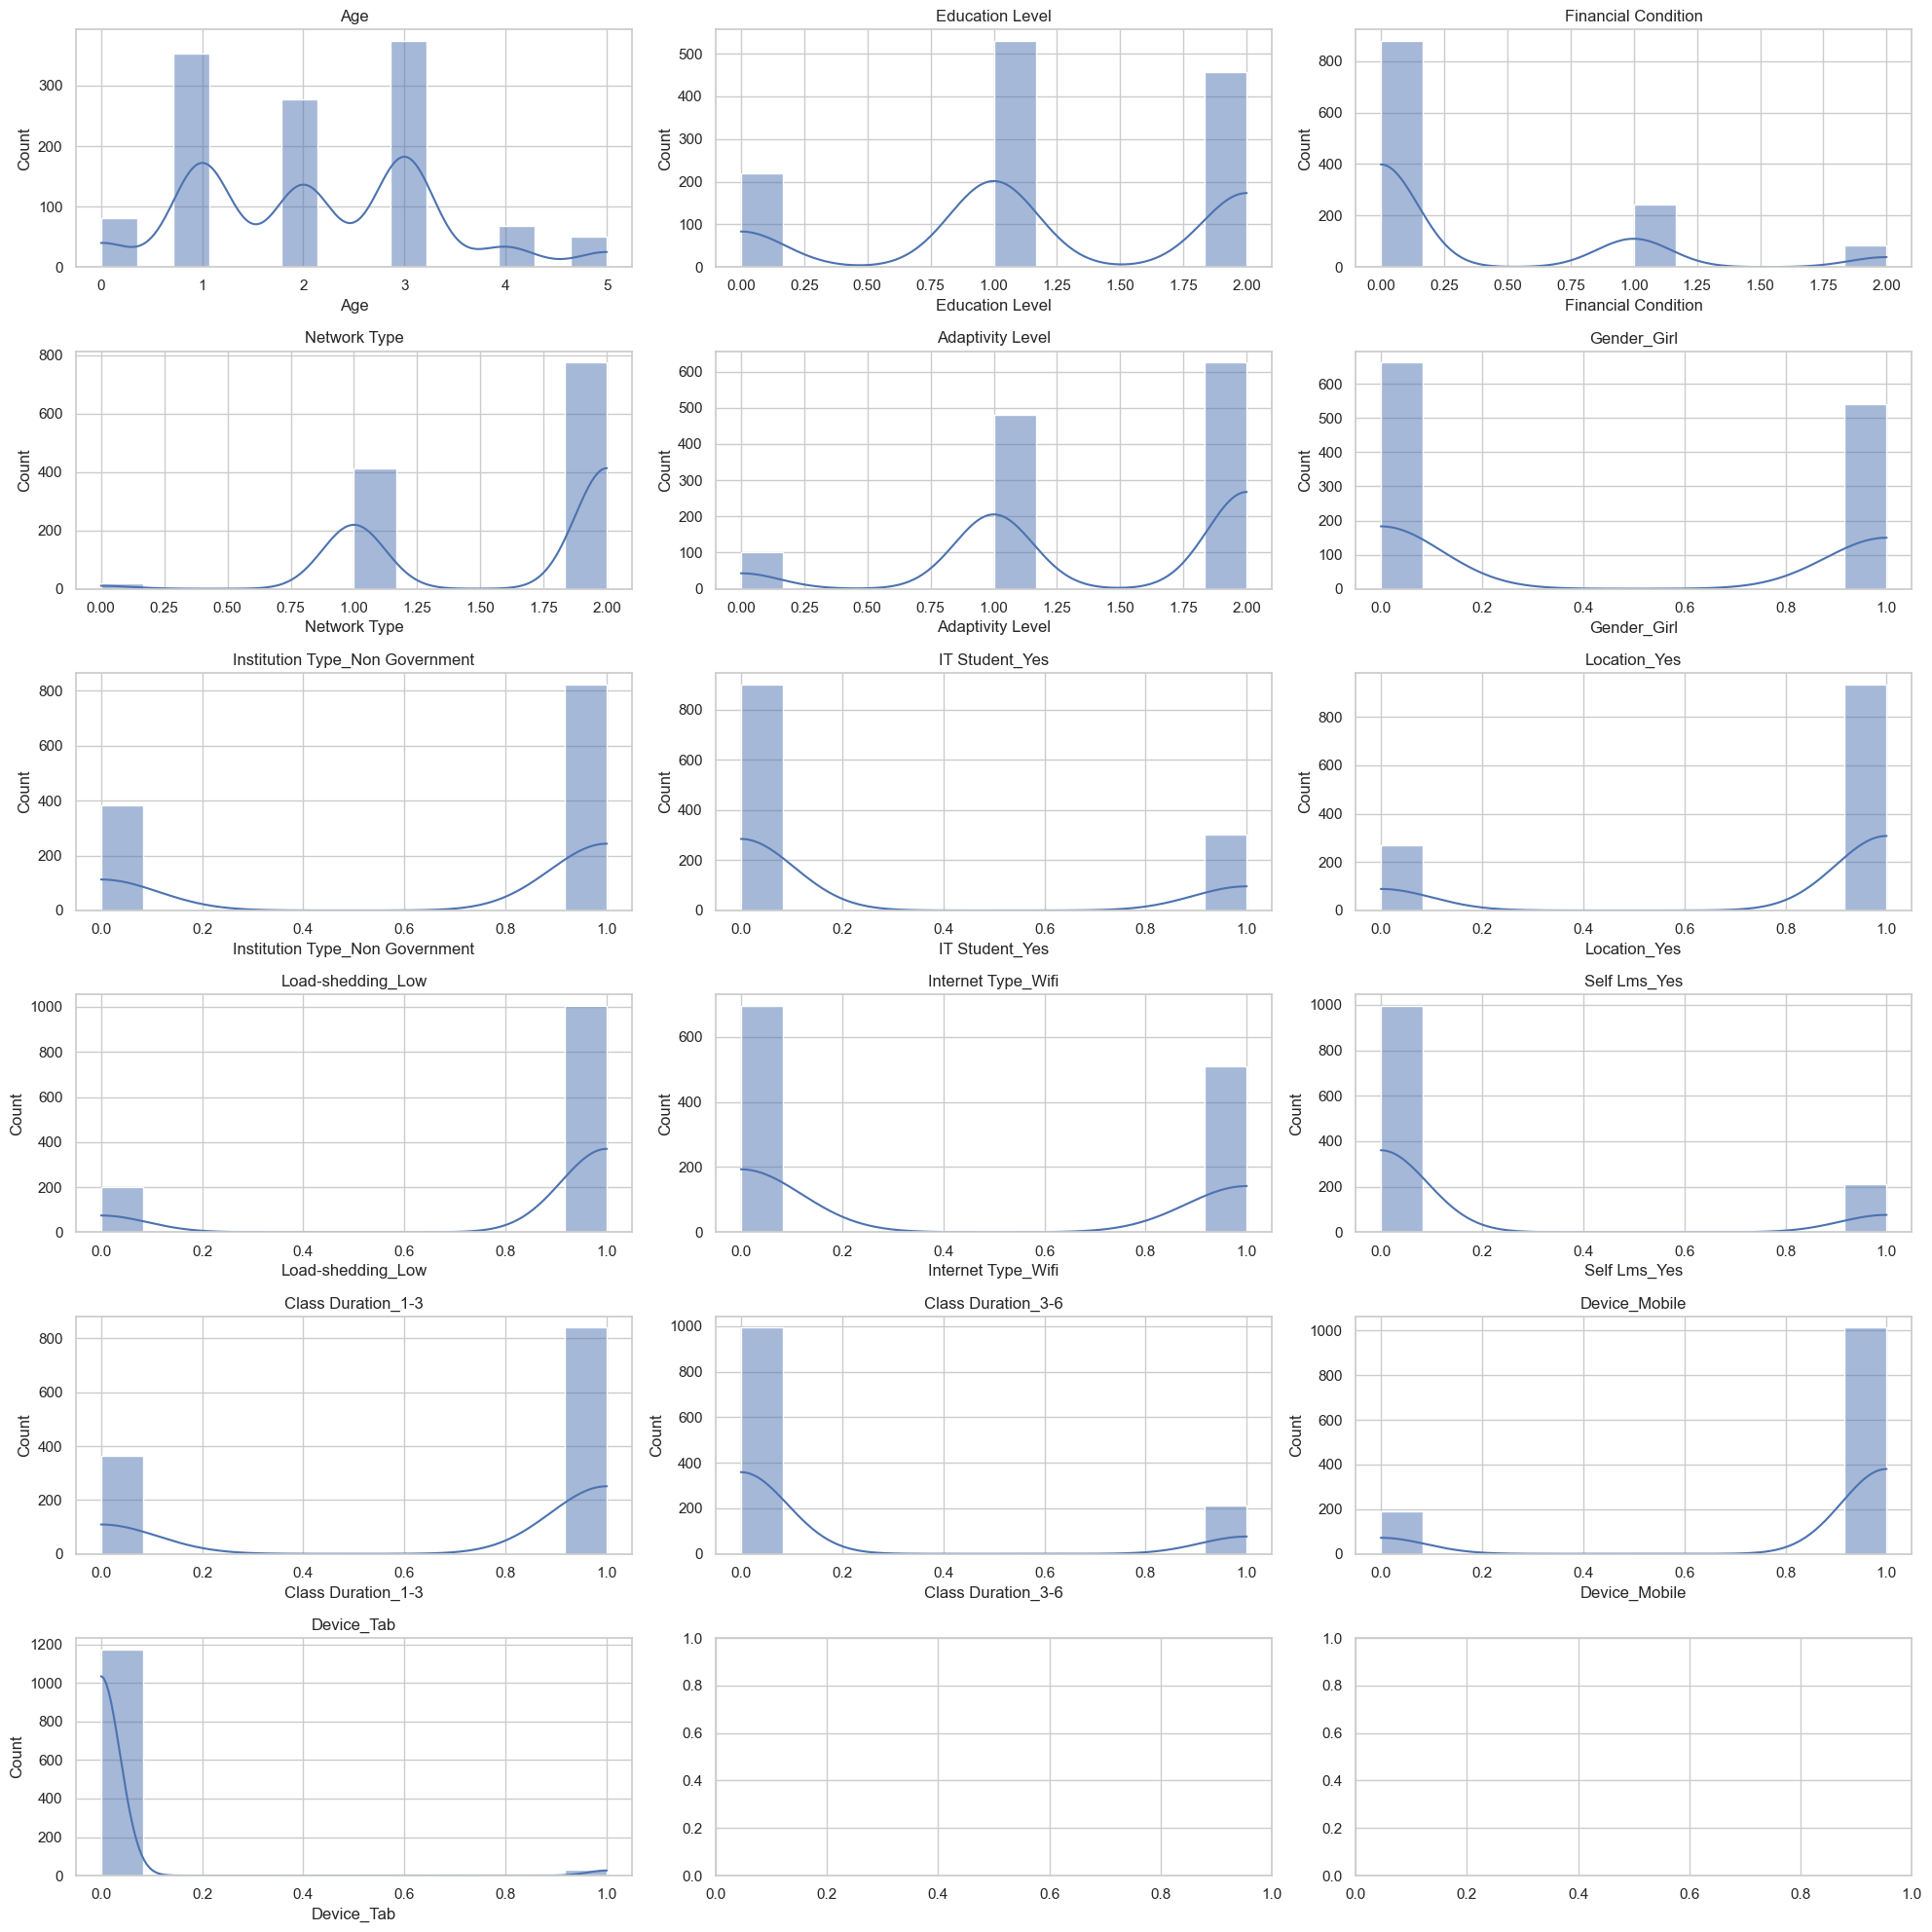

In [14]:
# Plotting distributions of various features
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 20))

columns = one_hot_encoded_df.columns
index = 0

for i in range(6):
    for j in range(3):
        if index < len(columns):
            sns.histplot(one_hot_encoded_df[columns[index]], kde=True, ax=axes[i, j])
            axes[i, j].set_title(columns[index])
            index += 1

plt.tight_layout()
plt.show()

# Machine Learning Algorithms

Use KNN and Decision tree and find which one is working better.

### Define X and Y

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X = one_hot_encoded_df.drop('Adaptivity Level', axis = 1)
Y = one_hot_encoded_df['Adaptivity Level']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 59)

### Feature Scaling

### Train Test Split

In [21]:
# Initializing and training the Decision Tree Classifier with Gini impurity
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=59)
dt_gini.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=59)

In [22]:
# Initializing and training the Decision Tree Classifier with Information Gain (Entropy)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=59)
dt_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=59)

# KNN

#### Check different distance metric

**Euclidean**

**Manhattan**

# Decision Tree

**Using Entropy**

**Use Gini Index**

# All the Best!